# Outcome Analysis
by Cara Monastra

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 

# Load the CSV file created in Part 1 into a Pandas DataFrame
df = pd.read_csv("./Resources/all_data_clean_2.csv")

# Display sample data
df.head(2)

,UNITID,OPEID,OPEID6,school_name,school_city,school_state,school_zip,Lat,Lng,avg_family_income,...,race_unkn,gender_men,gender_women,institution_level,highest_degree,comp_rate_150,SAT_Avg,bachelor_degree,deg_of_urban,headcount
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,34.783368,-86.568502,32103.62,...,0.0440,0.3978,0.6022,1,4,0.2866,959.0,585.0,12.0,6560.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345,57554.38,...,0.0059,0.3816,0.6184,1,4,0.6117,1245.0,2725.0,12.0,25843.0


In [24]:
# Set the color palette
color_taupe = (150/255, 140/255, 140/255)       # Taupe
color_sage = (165/255, 171/255, 129/255)        # Sage
color_rust = (221/255, 128/255, 71/255)         # Rust
color_green = (123/255, 167/255, 157/255)       # Green
color_blue = (148/255, 182/255, 210/255)        # ice Blue
color_brown = (119/255, 95/255, 85/255)         # Brown
color_gold = (216/255, 178/255, 92/255)         # Brown
color_tan = (235/255, 221/255, 195/255)         # Brown

In [25]:
#getting the quartiles in the df 


quartiles = df['avg_net_price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
medianq = quartiles[0.5]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


max = df['avg_net_price'].max()
min = df['avg_net_price'].min()


bins = [-10000, lower_bound, lowerq, medianq, upperq, upper_bound, 100000]

# Create the names for the five bins
group_names = ['Out-','Q1','Q2', 'Q3', 'Q4', 'Out+']         # A list of potential letter grades

df['Avg_Net_Price_Q'] = pd.cut(df['avg_net_price'], bins, labels=group_names, include_lowest=True)


df.head(2)

,UNITID,OPEID,OPEID6,school_name,school_city,school_state,school_zip,Lat,Lng,avg_family_income,...,gender_men,gender_women,institution_level,highest_degree,comp_rate_150,SAT_Avg,bachelor_degree,deg_of_urban,headcount,Avg_Net_Price_Q
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,34.783368,-86.568502,32103.62,...,0.3978,0.6022,1,4,0.2866,959.0,585.0,12.0,6560.0,Q2
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345,57554.38,...,0.3816,0.6184,1,4,0.6117,1245.0,2725.0,12.0,25843.0,Q2


y = 1e-05x + 0.38
R-Squared = 0.17


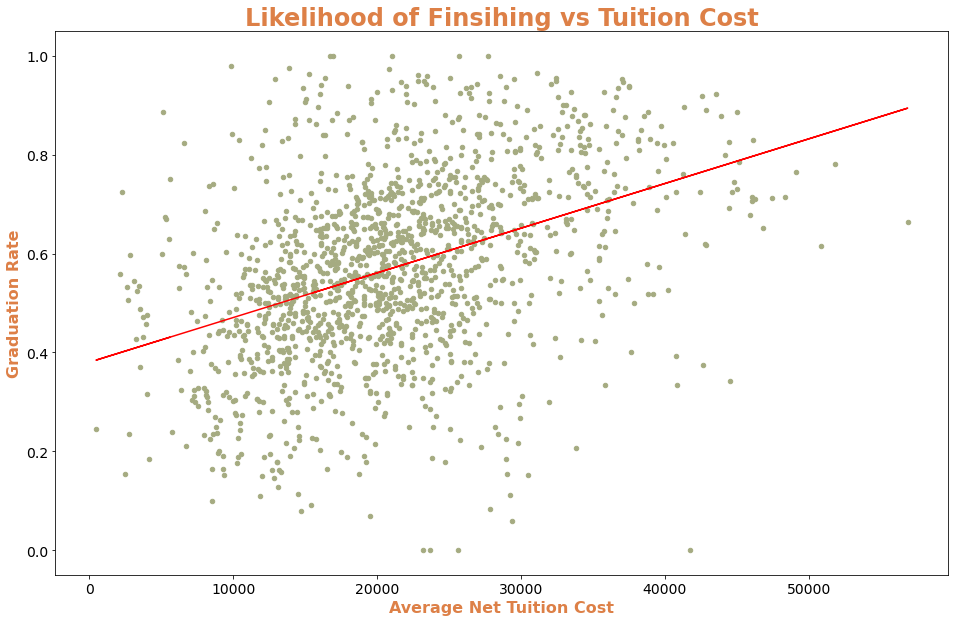

In [39]:
df.plot.scatter(x = "avg_net_price", 
                y = "comp_rate_150", 
               figsize = (16,10),   
               color = color_sage,
               fontsize = 14
               )
  
plt.title('Likelihood of Finsihing vs Tuition Cost',                    
            fontsize = 24,
            color=color_rust, 
            fontweight="bold")         

plt.xlabel('Average Net Tuition Cost',                           
            fontsize = 16,
            color=color_rust, 
            fontweight="bold")

plt.ylabel('Graduation Rate',                 
            fontsize = 16, 
            color=color_rust, 
            fontweight="bold")     

xdata = df['avg_net_price']
ydata = df['comp_rate_150']  
    
    
    # linear Regression equation calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
regress_values = xdata * slope + intercept

    # create a string annoation that for the equation of the line and r**2
line_eq_str = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))       
r_square_str = f'R-Squared = {round(rvalue**2,2)}'                                  
plt.plot(xdata,regress_values,'red')

print(line_eq_str)
print(r_square_str)

save_fig = os.path.join('.', 'Output', 'graduationrate.jpg')
plt.savefig(save_fig, bbox_inches='tight')


y = 0.47x + 32359.81
R-Squared = 0.11


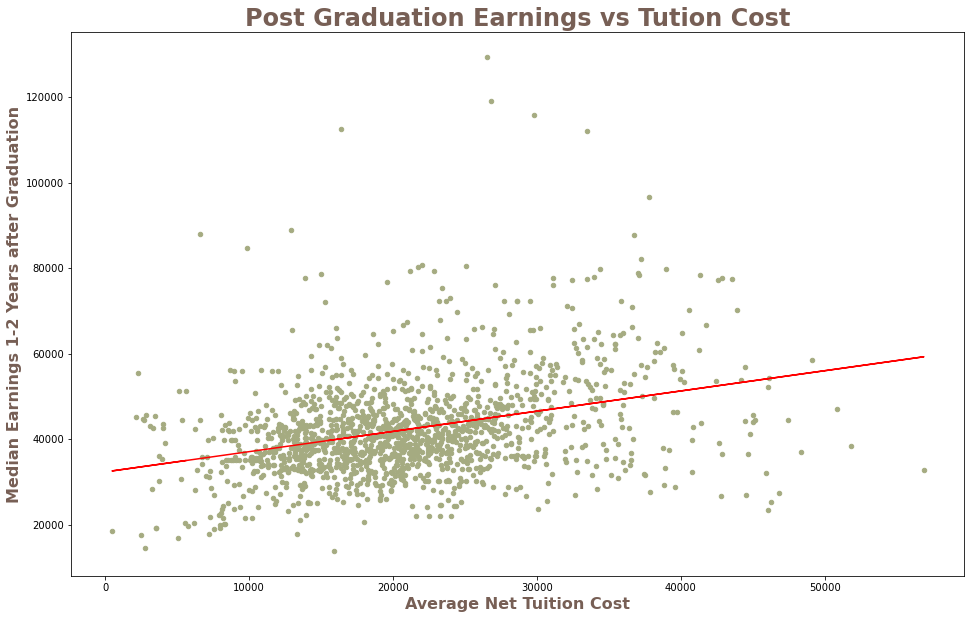

In [27]:
df.plot.scatter(x = "avg_net_price", 
                y = "median_earnings_y6", 
                title = "Tuition Cost vs Median Earning 6 Years After Graduation", 
                ylabel = "Median Earning", 
                xlabel = "Average Net Price",
                figsize = (16,10),   
                color = color_sage
               )
  
plt.title('Post Graduation Earnings vs Tution Cost',                    
            fontsize = 24,
            color=color_brown, 
            fontweight="bold")         

plt.xlabel('Average Net Tuition Cost',                           
            fontsize = 16,
            color=color_brown, 
            fontweight="bold")

plt.ylabel('Median Earnings 1-2 Years after Graduation',                 
            fontsize = 16, 
            color=color_brown, 
            fontweight="bold")     


xdata = df['avg_net_price']
ydata = df['median_earnings_y6']  


  # linear Regression equation calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
regress_values = xdata * slope + intercept

    # create a string annoation that for the equation of the line and r**2
line_eq_str = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))       # build text string of the form y = mx + b
r_square_str = f'R-Squared = {round(rvalue**2,2)}'                                  # build text string R-Squared = 

plt.plot(xdata,regress_values,'red')


print(line_eq_str)
print(r_square_str)


save_fig = os.path.join('.', 'Output', 'earnings.jpg')
plt.savefig(save_fig, bbox_inches='tight')

In [28]:
#making a condensed df 

quartiles_df = df[['Avg_Net_Price_Q', 'comp_rate_150', 'median_earnings_y6']].copy()

quartiles_df.drop(quartiles_df[quartiles_df['Avg_Net_Price_Q']== 'Out-'].index, inplace = True)
quartiles_df.drop(quartiles_df[quartiles_df['Avg_Net_Price_Q']== 'Out+'].index, inplace = True)

In [29]:
file_cara = os.path.join('Output', 'data_and_Q.csv')
quartiles_df.to_csv(file_cara, index=False, header=True) 

In [30]:
x = quartiles_df.groupby(["Avg_Net_Price_Q"]).mean()["median_earnings_y6"].drop(index = ["Out+", "Out-"])
x2 = quartiles_df.groupby(["Avg_Net_Price_Q"]).mean()["comp_rate_150"].drop(index = ["Out+", "Out-"])

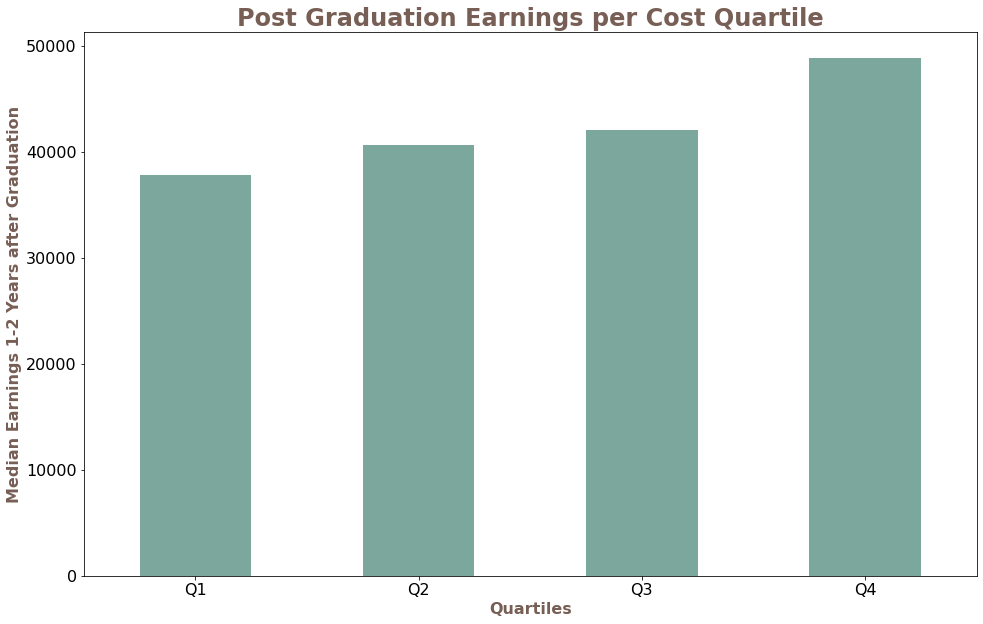

In [37]:
xy = x.plot.bar(x = 'Avg_Net_Price_Q', 
           y = 'median_earnings_y6', 
           figsize = (16,10), 
           color=color_green,
           fontsize = 16,
          )

plt.title('Post Graduation Earnings per Cost Quartile',                    
            fontsize = 24,
            color=color_brown, 
            fontweight="bold")         

plt.xlabel('Quartiles',                           
            fontsize = 16,
            color=color_brown, 
            fontweight="bold")

plt.ylabel('Median Earnings 1-2 Years after Graduation',                 
            fontsize = 16, 
            color=color_brown, 
            fontweight="bold")     

plt.xticks(rotation = 0)

save_fig = os.path.join('.', 'Output', 'earningsbar.jpg')
plt.savefig(save_fig, bbox_inches='tight')

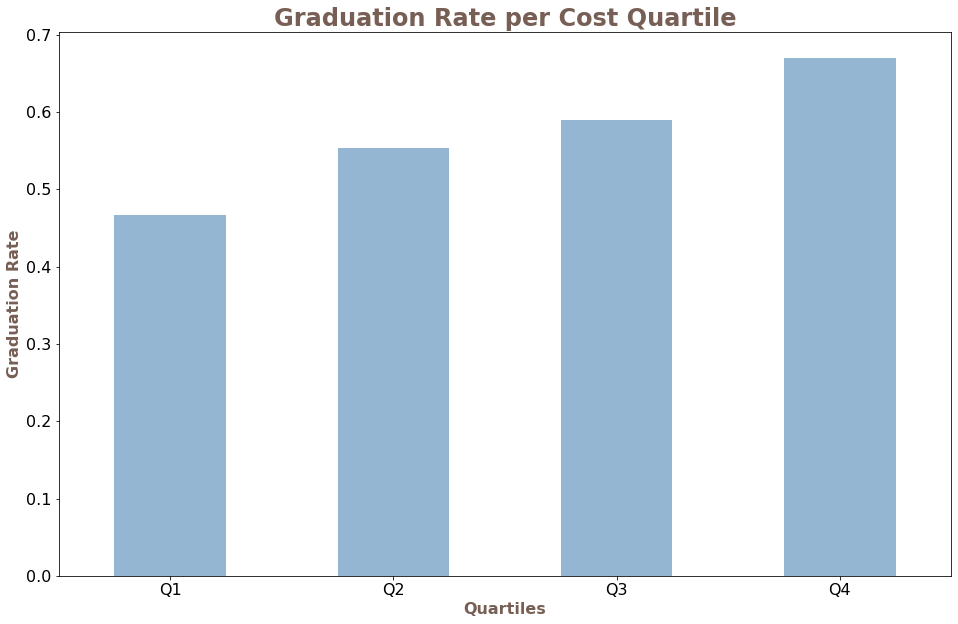

In [38]:
x2.plot.bar(x = 'Avg_Net_Price_Q', 
            y = 'comp_rate_150',
            figsize = (16,10), 
            color=color_blue,
            fontsize = 16  
          )

plt.title('Graduation Rate per Cost Quartile',                    
            fontsize = 24,
            color=color_brown, 
            fontweight="bold")         

plt.xlabel('Quartiles',                           
            fontsize = 16,
            color=color_brown, 
            fontweight="bold")

plt.ylabel('Graduation Rate',                 
            fontsize = 16, 
            color=color_brown, 
            fontweight="bold")     

plt.xticks(rotation = 0)
           
save_fig = os.path.join('.', 'Output', 'graduationbar.jpg')
plt.savefig(save_fig, bbox_inches='tight')           